Fatemeh Zahedi          HW2             1215240130          STP 598



In [110]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import seaborn; seaborn.set()
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
import math

##sklearn metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix

##sklearn model selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import validation_curve
from sklearn.model_selection import GridSearchCV
#ipython magic function, helps display of plots in a notebook
%matplotlib inline

In [12]:
trainB = pd.read_csv("http://www.rob-mcculloch.org/data/smsTrainB.csv")
trainyB = pd.read_csv("http://www.rob-mcculloch.org/data/smsTrainyB.csv")['smsTrainyB']
print(trainB.shape)
print(trainyB.shape)

(4169, 1139)
(4169,)


In [46]:
#iispam = np.where(trainyB == 1)
iispam = [i for i in range(trainyB.shape[0]) if trainyB[i] == 1]
notiispam = [i for i in range(trainyB.shape[0]) if trainyB[i] == 0]
#print(iispam)

In [3]:
trainyB.value_counts()/trainyB.shape[0] #train ham/spam frequencies

0    0.864716
1    0.135284
Name: smsTrainyB, dtype: float64

In [4]:
pd.crosstab(trainyB,trainB['age'])

age,0,1
smsTrainyB,,
0,3600,5
1,552,12


In [6]:
pd.crosstab(trainB['age'],trainB['adult'])

adult,0,1
age,,
0,4147,5
1,17,0


Get the joint frequencies of (age,adult) for the spam observations.

In [44]:
pd.crosstab(trainB.iloc[iispam]['age'],trainB.iloc[iispam]['adult'])

adult,0,1
age,,
0,549,3
1,12,0


Get the joint frequencies of (age,adult) for the ham observations.

In [47]:
pd.crosstab(trainB.iloc[notiispam]['age'],trainB.iloc[notiispam]['adult'])

adult,0,1
age,,
0,3598,2
1,5,0


In [53]:
print('p(age=0,adult=1|ham)= ', 5/(3598+7))

p(age=0,adult=1|ham)=  0.0013869625520110957


-----------------------
Part a)

In [60]:
pd.crosstab(trainyB,trainB['age'])


age,0,1
smsTrainyB,,
0,3600,5
1,552,12


In [61]:
print('p(age=yes|ham)= ', (5)/(3600+5))

p(age=yes|ham)=  0.0013869625520110957


-----------
part b)

In [203]:
print('p(ham)= ',len(notiispam)/trainyB.shape[0])
print('p(spam)= ',len(iispam)/trainyB.shape[0])

p(ham)=  0.8647157591748621
p(spam)=  0.13528424082513793


In [70]:
pd.crosstab(trainyB,trainB['adult'])

adult,0,1
smsTrainyB,,
0,3603,2
1,561,3


p(ham)p(ad=n|ham)p(ag=y|ham)/(p(ham)p(ad=n|ham)p(ag=y|ham)+p(spam)p(ad=n|spam)p(ag=y|spam)))

In [71]:
print('p(ham|adult=no,age=yes)= ',(0.86*(3603/3605)*(5/3605))/(0.86*(3603/3605)*(5/3605)+0.14*(561/564)*(12/(12+552))))

p(ham|adult=no,age=yes)=  0.2869132530331376


-----------------
part c)

In [ ]:
p(h)p(ad=n,ag=y|h)/(p(h)p(ad=n,ag=y|h)+p(s)p(ad=n,ag=y|s))

In [72]:
print('p(ham|adult=no,age=yes)= ',(0.86*5/(7+3598))/(0.86*5/(7+3598)+0.14*12/(15+549)))

p(ham|adult=no,age=yes)=  0.28593661573288054


---------------------------
part d)

p(h)p(ad=y,ag=y|h)/(p(h)p(ad=y,ag=y|h)+p(s)p(ad=y,ag=y|s))

In [73]:
print('p(ham|adult=yes,age=yes)= ',(0.86*0))

p(ham|adult=yes,age=yes)=  0.0


-----------------------------------------------------------------------

Question 2

In [88]:
cd = pd.read_csv("http://www.rob-mcculloch.org/data/susedcars.csv")
cd = cd[['price','mileage','year']]
cd['price'] = cd['price']/1000
cd['mileage'] = cd['mileage']/1000


Text(0, 0.5, 'price')

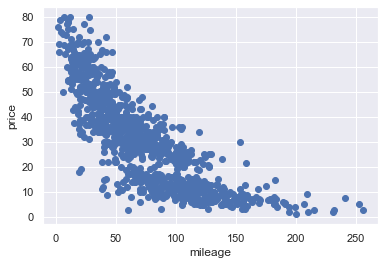

In [78]:
plt.scatter(cd['mileage'],cd['price'])
plt.xlabel('mileage'); plt.ylabel('price')

It makes sense, because when the mileage decrease, the price increase and vice versa. And in reality it is the same

In [98]:
X = cd.iloc[:,[1]].to_numpy()
y = cd['price'].to_numpy()
X.shape

(1000, 1)

In [94]:
lmmod = LinearRegression(fit_intercept=True)
lmmod.fit(X,y)


LinearRegression()

10.656766465789904


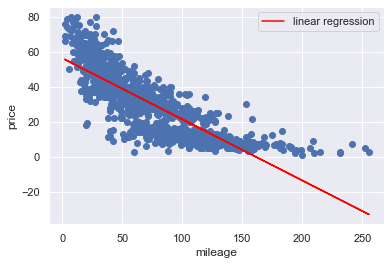

In [153]:
ypredictedreg = lmmod.predict(X)
plt.scatter(X,y)
plt.plot(X,ypredictedreg,c='red',label="linear regression") #add the line
plt.xlabel('mileage'); plt.ylabel('price')
plt.legend()
error = math.sqrt(mean_squared_error(y,ypredictedreg))
print(error)

[8.08793327 8.6019978  8.80996211 9.09480346 9.42767209]


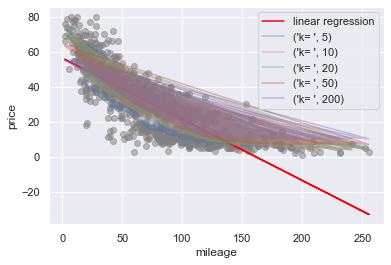

In [196]:
kvec = [5, 10, 20, 50, 200] #values of k to try
ormsev = np.zeros(len(kvec))
plt.scatter(X,y,c='gray',alpha=0.5)
plt.plot(X,ypredictedreg,c='red',label="linear regression")
for i in range(len(kvec)):
   tmod = KNeighborsRegressor(n_neighbors=kvec[i])
   tmod.fit(X,y)
   yhat = tmod.predict(X)
   la = 'k= ',int(kvec[i])
   plt.plot(X,yhat,alpha=0.4,label=la)
   ormsev[i] = math.sqrt(mean_squared_error(y,yhat))


plt.xlabel('mileage'); plt.ylabel('price')
plt.legend()
print(ormsev)

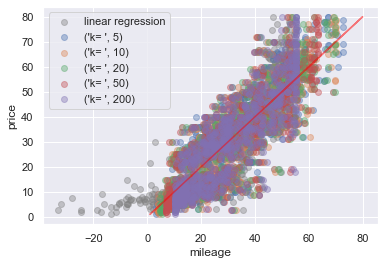

In [199]:
plt.plot(y,y,c='red',alpha=0.5)
plt.scatter(ypredictedreg,y,c='gray',alpha=0.4,label="linear regression")
for i in range(len(kvec)):
   
   tmod = KNeighborsRegressor(n_neighbors=kvec[i])
   tmod.fit(X,y)
   yhat = tmod.predict(X)
   la = 'k= ',int(kvec[i])
   plt.scatter(yhat,y,alpha=0.4,label=la)
   plt.xlabel('mileage'); plt.ylabel('price')
   plt.legend()

Among ks that I tested 10 seems nice enough, because it is still big value and error is not that much different than the smaller values

In [187]:
tmod = KNeighborsRegressor(n_neighbors=10)
tmod.fit(X,y)
xinput=np.array([[100000/1000]])
yhat100 = tmod.predict(xinput)
print(yhat100)


[21.7053]


In [188]:
yreg100 = lmmod.predict(xinput)
print(yreg100)

[21.36233202]


In [ ]:
Based on the result from the all data, KNN seems better than linear model

-----------------------------------------------------------------------

Question 3)

In [189]:
rng = np.random.RandomState(34)
Xtrain, Xtest, ytrain, ytest = train_test_split(X,y,random_state=rng, test_size=.25)

10.496227110154015
10.720839417688824


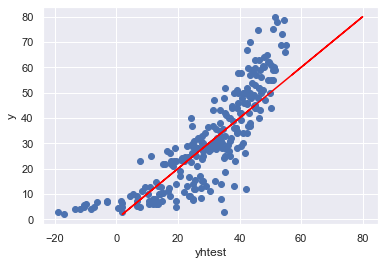

In [192]:
lmmod = LinearRegression(fit_intercept=True)
lmmod.fit(Xtrain,ytrain)
yhatreg = lmmod.predict(Xtest)
plt.scatter(yhatreg,ytest)
plt.plot(ytest,ytest,c='red') #add the line
plt.xlabel('yhtest'); plt.ylabel('y')
ormsev = math.sqrt(mean_squared_error(ytest,yhatreg))
print(ormsev)
yhattrain = lmmod.predict(Xtrain)
irmsev = math.sqrt(mean_squared_error(ytrain,yhattrain))
print(irmsev)

9.010152470017365
8.803753570560684


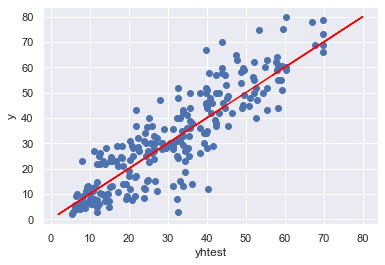

In [193]:
tmod = KNeighborsRegressor(n_neighbors=10)
tmod.fit(Xtrain,ytrain)
yhatknn = tmod.predict(Xtest)
plt.scatter(yhatknn,ytest)
plt.plot(ytest,ytest,c='red') #add the line
plt.xlabel('yhtest'); plt.ylabel('y')
ormsev = math.sqrt(mean_squared_error(ytest,yhatknn))
print(ormsev)
yhattrainknn = tmod.predict(Xtrain)
irmsev = math.sqrt(mean_squared_error(ytrain,yhattrainknn))
print(irmsev)

Both based on the error and based on the plots, knn is the better model for the cars data, the good point about KNN is that it doesn't have a negative value as a predicted price